In [41]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from random import random , seed
seed(10)

In [49]:
#Define a class with the charectristics of adaline neuron
class madaline_neuron:

    # one can change these constants
    def __init__(self , in_num , w , b):
        self.in_num = in_num
        self.w = w
        self.alpha = 0.01
        self.threshold = b
        self.net = 0
        self.h = 0

    def setInput(self , i):
        input = np.transpose(i)
        self.net = np.sum(np.matmul(self.w , input)) + self.threshold

    def getH(self):
        if self.net >= 0 : self.h = 1
        else : self.h = -1
        return self.h

    def getNet(self):
        return self.net

    def getW(self):
        return self.w

    def getThreshold(self):
        return self.threshold

    def learn(self , sx , sy ,t ,num):
        i=0
        #start using the formula to find the right weights and biyas
        temp =[]
        for i in range(num):
            self.setInput([sx , sy])
            self.w[0] = self.w[0] + (self.alpha * (t - self.net) * sx )
            self.w[1] = self.w[1] + (self.alpha * (t - self.net) * sy )
            #find the right biyas
            self.threshold = self.threshold + (self.alpha * (t - self.net))
            temp.append(1/2 * ((t - self.net)**2))
        return temp

    def isEnough(self , sx , sy , t ,num):
        CONST_ERROR_THRESHOLD = 1
        flag = False
        for i in range (num):
            self.setInput(sx[i] , sy[i])
           # print((t - self.net)**2)
            if ((t - self.net) **2) > CONST_ERROR_THRESHOLD : 
                flag = True
        return flag

               

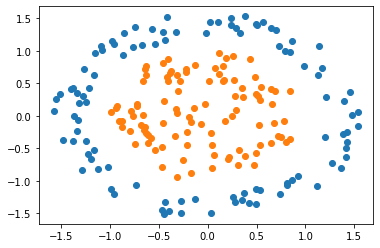

In [5]:
#Read data from csv
headers = ['X', 'Y', 'T']
df = pd.read_csv('/content/MadaLine.csv' , names=headers)
df = df.reset_index()  # make sure indexes pair with number of rows

#Apply data into lists
xData01 =[]
yData01 = []
xData02 =[]
yData02 = []

for index, row in df.iterrows():
    if row['T'] == 1:
        xData01 = xData01 + [row['X']]
        yData01 = yData01 + [row['Y']]
    else: 
        xData02 = xData02 + [row['X']]
        yData02 = yData02 + [row['Y']]
plt.scatter(xData01 , yData01)
plt.scatter(xData02 , yData02)

In [64]:
#Start the algorithem 
#Initiate neurons with small numbers for thier weights
z0 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z1 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z2 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
neuron_list = [z0 , z1 , z2]
#---
y0 = madaline_neuron(3 , [0.5 , 0.5 , 0.5 ]  , 0.5)
#---
ct=0
nem = [1 , 1]
#keep going until the conditions are satisfied 
while(nem[0] != 0 and nem[1] != 0 ):
    nem[0] = 0
    nem[1] = 0
    for index, row in df.iterrows():                          #for every input in dataset
        h_list = []                                           #list for outputs of neurons
        net_list = []                                         #list for net of neurons
        for neuron in neuron_list:                            #set the inputs of neurons in hidden layer 
            neuron.setInput([row['X'] , row['Y']])
            h_list.append(neuron.getH())
            net_list.append(neuron.getNet())
        y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
        outy0 = y0.getH()                                     #Get the output
        if (row['T']==1 and  outy0== -1) :                    #If output = 1  and target = -1 changes weights of the nuron witch it's net is closest to 0
            valtemp = net_list[0]
            indextemp = 0
            for i in range(len(net_list)):
                if net_list[i] > valtemp : indextemp = i
            neuron_list[indextemp].learn(row['X'] , row['Y'] , 1 , 1)
            nem[0] +=1
        elif (row['T']==0 and  outy0== 1) :                   #If output = 1 and target = -1 change every neuron witch it's net is not negative
            for i in range(len(net_list)):
                if net_list[i] > 0 : neuron_list[i].learn(row['X'] , row['Y'] , -1 , 1)
            nem[1] +=1
    if (ct>500):break
    ct += 1
#-------------------------------------------------------------------------------------------------------------
#Checking the resault 
result = [0 , 0]
for index, row in df.iterrows():                          #for every input in dataset
    h_list = []
    for neuron in neuron_list:
        neuron.setInput([row['X'] , row['Y']])
        h_list.append(neuron.getH())
    y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
    outy0 = y0.getH()
    if ((outy0 == 1 and row['T'] == 1) or (outy0 == -1 and row['T'] == 0)): result[0] +=1
    elif ((outy0 == 1 and row['T'] == 0) or (outy0 == -1 and row['T'] == 1)) : result[1] +=1
print((result[0]/(result[0] + result[1])*100) , "percent of answers were correct")



74.5 percent of answers were correct


Plotting


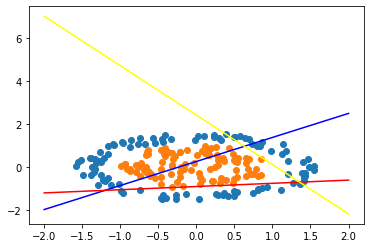

In [65]:
#Defining the categorizer line
z0_line = np.linspace(-2, 2, 100)
z1_line = np.linspace(-2, 2, 100)
z2_line = np.linspace(-2, 2, 100)

#Reciving weights and biyas of our neuron
weightsZ0 = z0.getW()
weightsZ1 = z1.getW()
weightsZ2 = z2.getW()

bZ0 = z0.getThreshold()
bZ1 = z1.getThreshold()
bZ2 = z2.getThreshold()


#put the calculated variables into the line
y_line_Z0 = ((weightsZ0[0] * z0_line) + bZ0) /-weightsZ0[1]
y_line_Z1 = ((weightsZ1[0] * z1_line) + bZ1) /-weightsZ1[1]
y_line_Z2 = ((weightsZ2[0] * z2_line) + bZ2) /-weightsZ2[1]

#Plot the data
print("Plotting")

plt.scatter(xData01 , yData01)
plt.scatter(xData02 , yData02)
plt.plot(z0_line ,y_line_Z0 , 'blue')
plt.plot(z1_line ,y_line_Z1 , 'red')
plt.plot(z2_line ,y_line_Z2 , 'yellow')

plt.show()

In [55]:
#Start the algorithem 
#Initiate neurons with small numbers for thier weights
z0 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z1 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z2 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z3 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
neuron_list = [z0 , z1 , z2 , z3]
#---
y0 = madaline_neuron(4 , [0.5 , 0.5 , 0.5 , 0.5]  , 1)
#---
ct=0
nem = [1 , 1]
#keep going until the conditions are satisfied 
while(nem[0] != 0 and nem[1] != 0 ):
    nem[0] = 0
    nem[1] = 0
    for index, row in df.iterrows():                          #for every input in dataset
        h_list = []                                           #list for outputs of neurons
        net_list = []                                         #list for net of neurons
        for neuron in neuron_list:                            #set the inputs of neurons in hidden layer 
            neuron.setInput([row['X'] , row['Y']])
            h_list.append(neuron.getH())
            net_list.append(neuron.getNet())
        y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
        outy0 = y0.getH()                                     #Get the output
        if (row['T']==1 and  outy0== -1) :                    #If output = 1  and target = -1 changes weights of the nuron witch it's net is closest to 0
            valtemp = net_list[0]
            indextemp = 0
            for i in range(len(net_list)):
                if net_list[i] > valtemp : indextemp = i
            neuron_list[indextemp].learn(row['X'] , row['Y'] , 1 , 1)
            nem[0] +=1
        elif (row['T']==0 and  outy0== 1) :                   #If output = 1 and target = -1 change every neuron witch it's net is not negative
            for i in range(len(net_list)):
                if net_list[i] > 0 : neuron_list[i].learn(row['X'] , row['Y'] , -1 , 1)
            nem[1] +=1
    if (ct>130):break
    ct += 1
#-------------------------------------------------------------------------------------------------------------
#Checking the resault 
result = [0 , 0]
for index, row in df.iterrows():                          #for every input in dataset
    h_list = []
    for neuron in neuron_list:
        neuron.setInput([row['X'] , row['Y']])
        h_list.append(neuron.getH())
    y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
    outy0 = y0.getH()
    if ((outy0 == 1 and row['T'] == 1) or (outy0 == -1 and row['T'] == 0)): result[0] +=1
    elif ((outy0 == 1 and row['T'] == 0) or (outy0 == -1 and row['T'] == 1)) : result[1] +=1
print((result[0]/(result[0] + result[1])*100) , "percent of answers were correct")

100.0 percent of answers were correct


Plotting


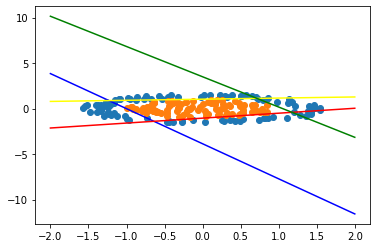

In [56]:
#Defining the categorizer line
z0_line = np.linspace(-2, 2, 100)
z1_line = np.linspace(-2, 2, 100)
z2_line = np.linspace(-2, 2, 100)
z3_line = np.linspace(-2, 2, 100)

#Reciving weights and biyas of our neuron
weightsZ0 = z0.getW()
weightsZ1 = z1.getW()
weightsZ2 = z2.getW()
weightsZ3 = z3.getW()

bZ0 = z0.getThreshold()
bZ1 = z1.getThreshold()
bZ2 = z2.getThreshold()
bZ3 = z3.getThreshold()


#put the calculated variables into the line
y_line_Z0 = ((weightsZ0[0] * z0_line) + bZ0) /-weightsZ0[1]
y_line_Z1 = ((weightsZ1[0] * z1_line) + bZ1) /-weightsZ1[1]
y_line_Z2 = ((weightsZ2[0] * z2_line) + bZ2) /-weightsZ2[1]
y_line_Z3 = ((weightsZ3[0] * z3_line) + bZ3) /-weightsZ3[1]


#Plot the data
print("Plotting")

plt.scatter(xData01 , yData01)
plt.scatter(xData02 , yData02)
plt.plot(z0_line ,y_line_Z0 , 'blue')
plt.plot(z1_line ,y_line_Z1 , 'red')
plt.plot(z2_line ,y_line_Z2 , 'yellow')
plt.plot(z3_line ,y_line_Z3 , 'green')

plt.show()


In [78]:
#Start the algorithem 
#Initiate neurons with small numbers for thier weights
z0 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z1 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z2 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z3 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z4 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z5 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z6 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z7 = madaline_neuron(2 , [random()-0.5 , random() -0.5] , random()-0.5)
z8 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
z9 = madaline_neuron(2 , [random()-0.5 , random()-0.5 ] , random()-0.5)
neuron_list = [z0 , z1 , z2 , z3 , z4 , z5 , z6 , z7 , z8 , z9]
#---
y0 = madaline_neuron(8 , [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,0.5 , 0.5]  , 3)
#---
ct=0
nem = [1 , 1]
#keep going until the conditions are satisfied 
while(nem[0] != 0 and nem[1] != 0 ):
    nem[0] = 0
    nem[1] = 0
    for index, row in df.iterrows():                          #for every input in dataset
        h_list = []                                           #list for outputs of neurons
        net_list = []                                         #list for net of neurons
        for neuron in neuron_list:                            #set the inputs of neurons in hidden layer 
            neuron.setInput([row['X'] , row['Y']])
            h_list.append(neuron.getH())
            net_list.append(neuron.getNet())

        y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
        outy0 = y0.getH()                                     #Get the output
        if (row['T']==1 and  outy0== -1) :                    #If output = 1  and target = -1 changes weights of the nuron witch it's net is closest to 0
            valtemp = net_list[0]
            indextemp = 0
            for i in range(len(net_list)):
                if net_list[i] > valtemp : indextemp = i
            neuron_list[indextemp].learn(row['X'] , row['Y'] , 1 , 1)
            nem[0] +=1
        elif (row['T']==0 and  outy0== 1) :                   #If output = 1 and target = -1 change every neuron witch it's net is not negative
            for i in range(len(net_list)):

                if net_list[i] > 0 : neuron_list[i].learn(row['X'] , row['Y'] , -1 , 1)
            nem[1] +=1
    if (ct>40):break
    ct += 1
#-------------------------------------------------------------------------------------------------------------
#Checking the resault 
result = [0 , 0]
for index, row in df.iterrows():                          #for every input in dataset
    h_list = []
    for neuron in neuron_list:
        neuron.setInput([row['X'] , row['Y']])
        h_list.append(neuron.getH())
    y0.setInput(h_list)                                   #Give the output of hidden layer neurons to output layer
    outy0 = y0.getH()
    if ((outy0 == 1 and row['T'] == 1) or (outy0 == -1 and row['T'] == 0)): result[0] +=1
    elif ((outy0 == 1 and row['T'] == 0) or (outy0 == -1 and row['T'] == 1)) : result[1] +=1
print((result[0]/(result[0] + result[1])*100) , "percent of answers were correct")

100.0 percent of answers were correct


Plotting


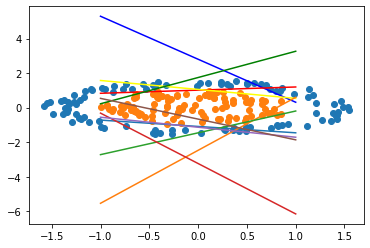

In [79]:
#Defining the categorizer line
z0_line = np.linspace(-1, 1, 100)
z1_line = np.linspace(-1, 1, 100)
z2_line = np.linspace(-1, 1, 100)
z3_line = np.linspace(-1, 1, 100)
z4_line = np.linspace(-1, 1, 100)
z5_line = np.linspace(-1, 1, 100)
z6_line = np.linspace(-1, 1, 100)
z7_line = np.linspace(-1, 1, 100)
z8_line = np.linspace(-1, 1, 100)
z9_line = np.linspace(-1, 1, 100)

#Reciving weights and biyas of our neuron
weightsZ0 = z0.getW()
weightsZ1 = z1.getW()
weightsZ2 = z2.getW()
weightsZ3 = z3.getW()
weightsZ4 = z4.getW()
weightsZ5 = z5.getW()
weightsZ6 = z6.getW()
weightsZ7 = z7.getW()
weightsZ8 = z8.getW()
weightsZ9 = z9.getW()

bZ0 = z0.getThreshold()
bZ1 = z1.getThreshold()
bZ2 = z2.getThreshold()
bZ3 = z3.getThreshold()
bZ4 = z4.getThreshold()
bZ5 = z5.getThreshold()
bZ6 = z6.getThreshold()
bZ7 = z7.getThreshold()
bZ8 = z8.getThreshold()
bZ9 = z9.getThreshold()

#put the calculated variables into the line
y_line_Z0 = ((weightsZ0[0] * z0_line) + bZ0) /-weightsZ0[1]
y_line_Z1 = ((weightsZ1[0] * z1_line) + bZ1) /-weightsZ1[1]
y_line_Z2 = ((weightsZ2[0] * z2_line) + bZ2) /-weightsZ2[1]
y_line_Z3 = ((weightsZ3[0] * z3_line) + bZ3) /-weightsZ3[1]
y_line_Z4 = ((weightsZ4[0] * z4_line) + bZ4) /-weightsZ4[1]
y_line_Z5 = ((weightsZ5[0] * z5_line) + bZ5) /-weightsZ5[1]
y_line_Z6 = ((weightsZ6[0] * z6_line) + bZ6) /-weightsZ6[1]
y_line_Z7 = ((weightsZ7[0] * z7_line) + bZ7) /-weightsZ7[1]
y_line_Z8 = ((weightsZ8[0] * z8_line) + bZ8) /-weightsZ8[1]
y_line_Z9 = ((weightsZ9[0] * z9_line) + bZ9) /-weightsZ9[1]

#Plot the data
print("Plotting")

plt.scatter(xData01 , yData01)
plt.scatter(xData02 , yData02)
plt.plot(z0_line ,y_line_Z0 , 'blue')
plt.plot(z1_line ,y_line_Z1 , 'red')
plt.plot(z2_line ,y_line_Z2 , 'yellow')
plt.plot(z3_line ,y_line_Z3 , 'green')
plt.plot(z4_line ,y_line_Z4  )
plt.plot(z5_line ,y_line_Z5  )
plt.plot(z6_line ,y_line_Z6  )
plt.plot(z7_line ,y_line_Z7  )
plt.plot(z6_line ,y_line_Z8  )
plt.plot(z7_line ,y_line_Z9  )

plt.show()
